# S9767

In [19]:
%load_ext autoreload
%autoreload 2
%run ../draw_functions.py
%run ../kstest.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from draw_functions import *
from kstest import *

In [21]:
#read csv
df = pd.read_csv('../csv/Delete.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df_05_08 = df[(df['xtime'] >= 0.5) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,D9425793-75AE-4CD5-B251-02F9658CEDC7,0.016667,1.434910,003909D,OJ0R2H4G,NaN
1,D9425793-75AE-4CD5-B251-02F9658CEDC7,0.026667,1.536596,003909D,OJ0R2H4G,10.168650
2,D9425793-75AE-4CD5-B251-02F9658CEDC7,0.036667,1.559193,003909D,OJ0R2H4G,2.259700
3,D9425793-75AE-4CD5-B251-02F9658CEDC7,0.047867,1.559193,003909D,OJ0R2H4G,0.000000
4,D9425793-75AE-4CD5-B251-02F9658CEDC7,0.066667,1.570492,003909D,OJ0R2H4G,0.600984
...,...,...,...,...,...,...
9890,B0C168BB-4941-4E4D-BB51-EDC9BB915D14,1.106667,10.021770,001707D,OJ0R2EOF,2.711640
9891,B0C168BB-4941-4E4D-BB51-EDC9BB915D14,1.148800,10.058076,001707D,OJ0R2EOF,0.861689
9892,B0C168BB-4941-4E4D-BB51-EDC9BB915D14,1.156667,10.066964,001707D,OJ0R2EOF,1.129850
9893,B0C168BB-4941-4E4D-BB51-EDC9BB915D14,1.166667,10.066964,001707D,OJ0R2EOF,0.000000


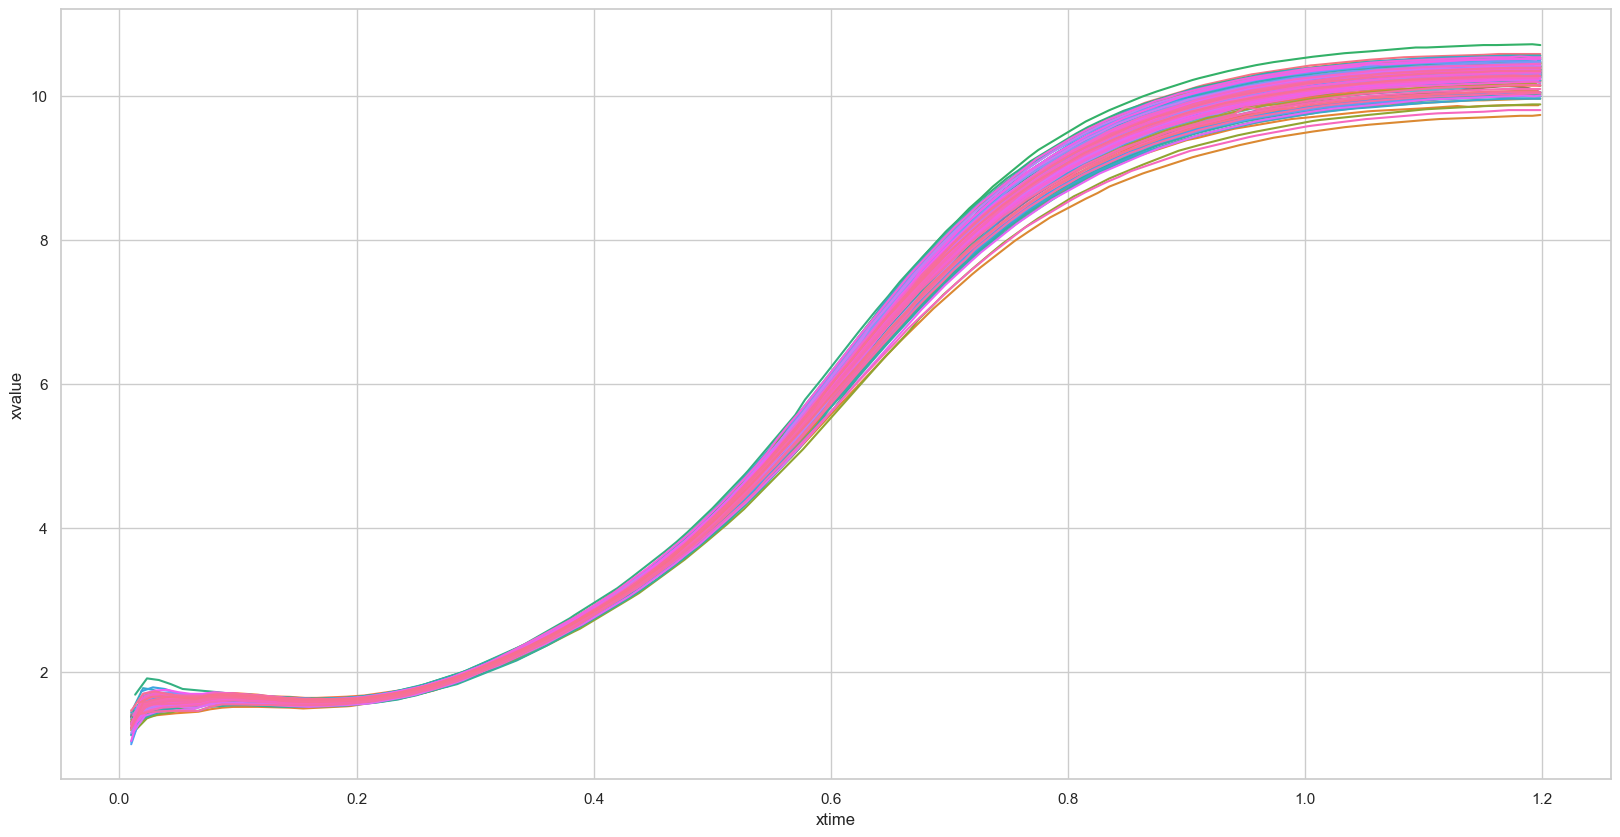

In [67]:
dessiner_commande(df,degree=12)

In [28]:
ptype = commande_type(df, 12)
pslope_type = commande_slope_type(df, 6)

In [43]:
from numpy import poly1d
pslope_type = poly1d([ 1.16151120e+04, -1.43951436e+05,  7.83878791e+05, -2.46445616e+06,
        4.94302908e+06, -6.59694544e+06,  5.93006593e+06, -3.55800781e+06,
        1.38482863e+06, -3.32646615e+05,  4.55597470e+04, -3.03546572e+03,
        6.92288828e+01])

## Analyse des pentes

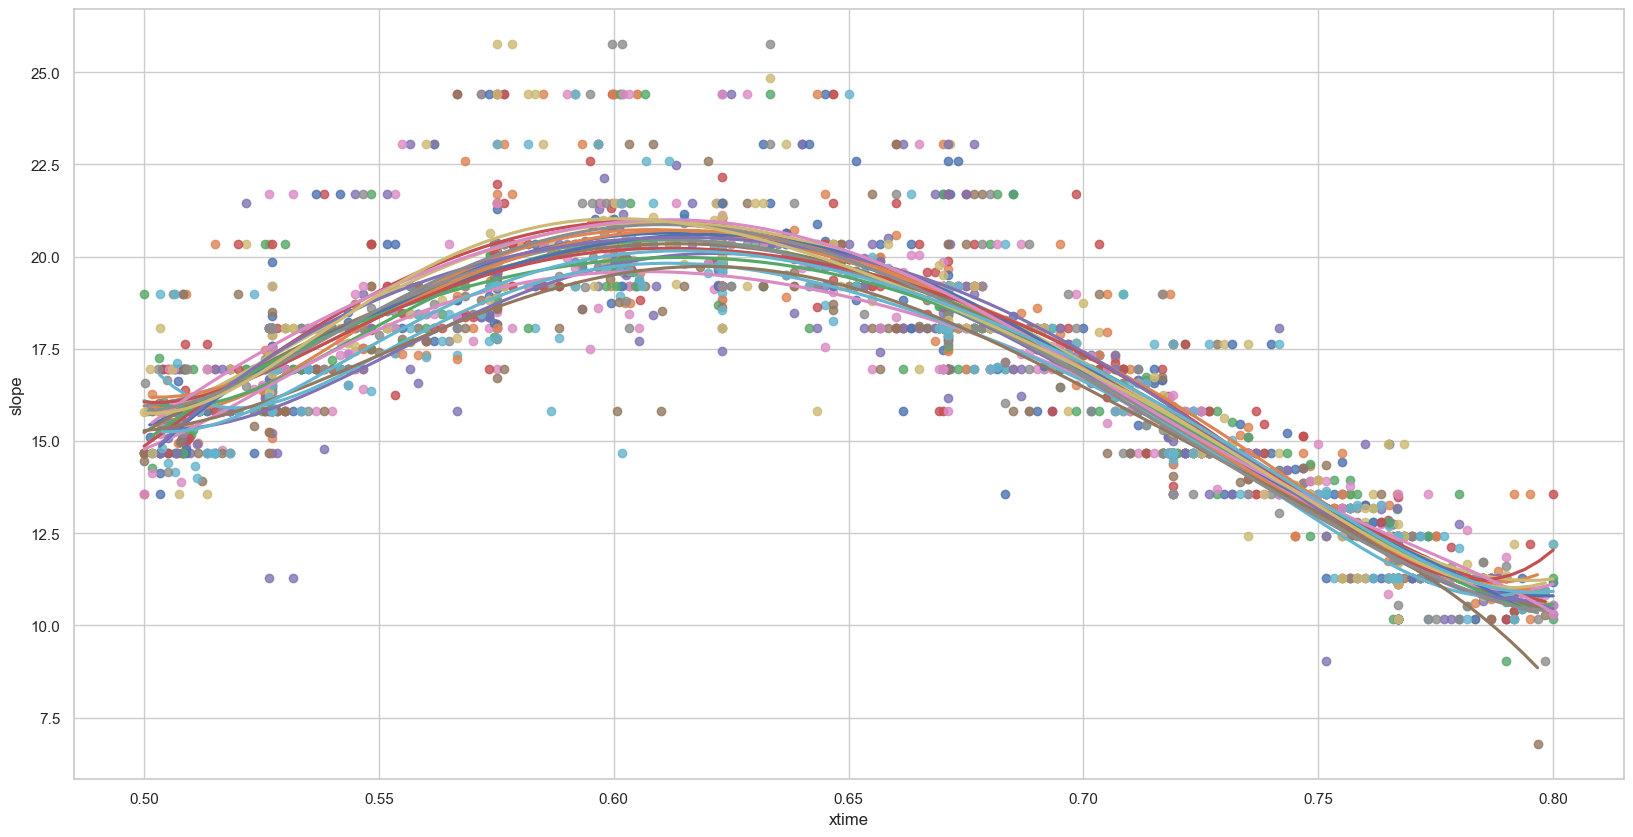

In [30]:
plt.figure(figsize=(20, 10))

sns.set(style="whitegrid")

for batch in df_05_08['Batch'].unique():
    df_batch = df_05_08[df_05_08['Batch'] == batch]
    sns.regplot(x='xtime', y='slope', data=df_batch,order = 6, ci=None, scatter=True)

## Test Type

- Batch 145807B: 134.45161649263727
- Batch 154412B: 128.67699677512618
- Batch 153110B: 100.59212419649602
- Batch 153911B: 92.12593914549257
- Batch 154913B: 59.54056976144513
- Batch 151208B: 50.68743565619879
- Batch 145206B: 40.99592978156963
- Batch 144305B: 40.49146368953352
- Batch 152209B: 14.602526197142154


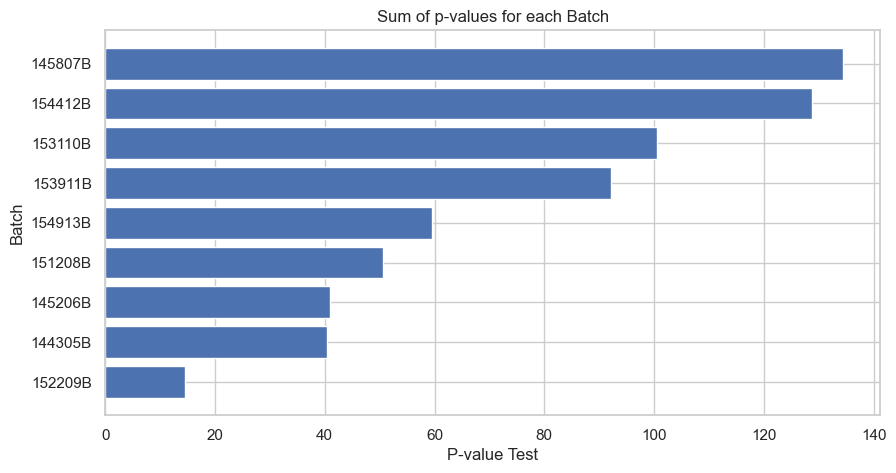

In [60]:
batch_pvalues = ks_batch_test_type_value(df, 12, ptype)

visualiser_batch_pvalue(batch_pvalues, log=True)

- Batch 153911B: 15.017104206877237
- Batch 153110B: 12.545202628603477
- Batch 145206B: 7.562876047971923
- Batch 152209B: 6.85844983483722
- Batch 151208B: 6.2111080677588895
- Batch 154412B: 4.40081655264441
- Batch 145807B: 4.201897199729622
- Batch 154913B: 3.659433705535686
- Batch 144305B: 2.3659084854219423


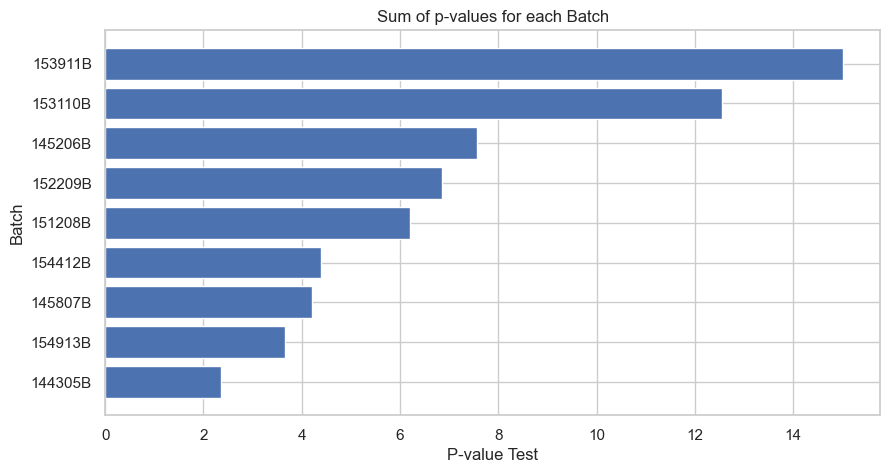

In [61]:
batch_pvalues = ks_batch_test_type_slope(df, 12, pslope_type)

visualiser_batch_pvalue(batch_pvalues, log=True)

In [59]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').mean()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - median_xtime

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 231001D est : 1.642 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 231802D est : 1.436 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 012413D est : 1.106 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 003909D est : 1.025 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 000406D est : 0.998 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 002908D est : 0.732 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 234404D est : 0.723 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 022018D est : 0.669 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 233303D est : 0.668 seconde
La différence de temps entre le max de la pente et la médiane po

In [61]:
round(np.std(max_slope_batch_xtime)*1000,2)

10.69

In [62]:
round(np.std(max_slope_sample_xtime)*1000,2)

41.96

In [43]:
max_slope_batch_xtime

Batch
000406D    0.573600
001707D    0.606667
002908D    0.614167
003909D    0.635833
005010D    0.603333
005911D    0.599537
011112D    0.599722
012413D    0.621400
013514D    0.604444
014415D    0.613333
015416D    0.603333
020617D    0.608333
022018D    0.585000
023219D    0.595000
023920D    0.632400
231001D    0.641567
231802D    0.623133
233303D    0.608333
234404D    0.625000
235405D    0.598333
Name: xtime, dtype: float64

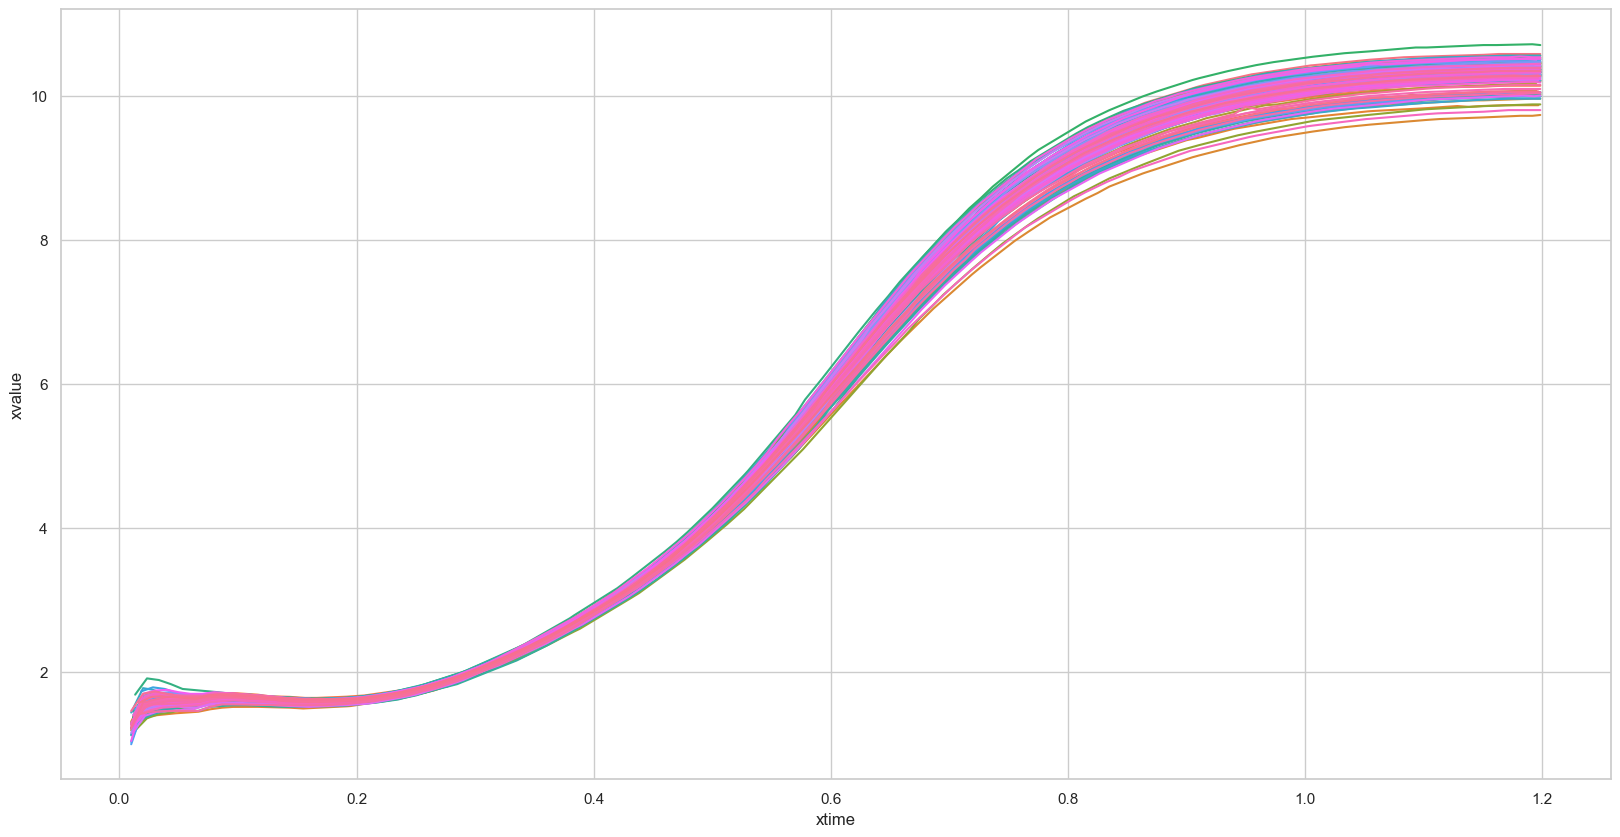

In [46]:
dessiner_commande(df)